In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("fake reviews dataset.csv")

In [5]:
data.head(10)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


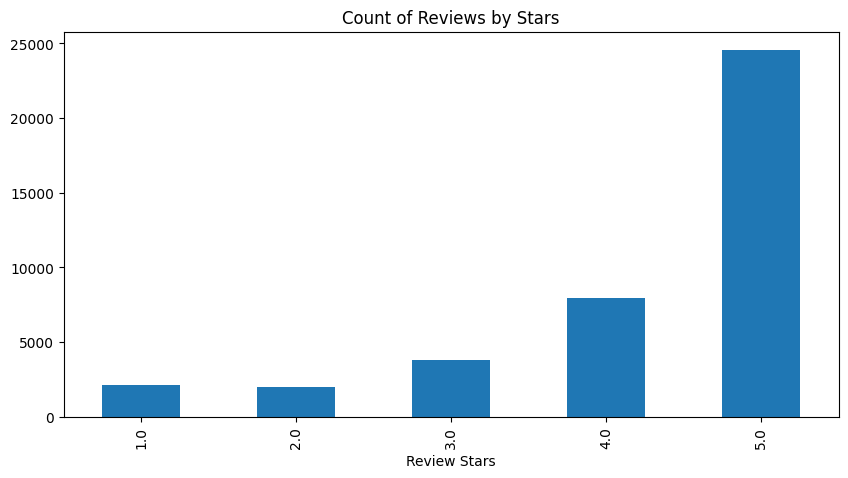

In [6]:
ax = data['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [8]:
data.shape

(40432, 4)

In [9]:
data.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [10]:
new_data = data.drop(["category", "rating"], axis=1)
new_data.head(10)

,label,text_
0,CG,"Love this! Well made, sturdy, and very comfor..."
1,CG,"love it, a great upgrade from the original. I..."
2,CG,This pillow saved my back. I love the look and...
3,CG,"Missing information on how to use it, but it i..."
4,CG,Very nice set. Good quality. We have had the s...
5,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,CG,They are the perfect touch for me and the only...
7,CG,These done fit well and look great. I love th...
8,CG,"Great big numbers & easy to read, the only thi..."
9,CG,My son loves this comforter and it is very wel...


In [11]:
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def text_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
new_data['text_'] = new_data["text_"].apply(text_cleaning)

In [14]:
new_data.head(20)

,label,text_
0,CG,love well made sturdi comfort love itveri pr...
1,CG,love great upgrad origin ive mine coupl year
2,CG,pillow save back love look feel pillow
3,CG,miss inform use great product price
4,CG,nice set good qualiti set two month
5,CG,want differ flavor
6,CG,perfect touch thing wish littl space
7,CG,done fit well look great love smooth edg extra
8,CG,great big number easi read thing didnt like size
9,CG,son love comfort well made also babi


In [15]:
new_data = new_data.head(40400)
new_data = new_data.sample(frac=1)

In [16]:

new_data.to_csv("cleandata.csv", index=False)

In [17]:
cleandata = pd.read_csv("cleandata.csv")
cleandata.shape

(40400, 2)

In [18]:
cleandata['id'] = range(1, len(cleandata) + 1)
cleandata.head(10)

,label,text_,id
0,CG,one bought anoth qualiti ok live room use,1
1,CG,buy danish oil pound expens bought one packa...,2
2,CG,dog hate trick keep next coupl monthsmi dog l...,3
3,CG,perfect work oven right height also love remov,4
4,OR,got give mth old chihuahua diagnos elbow dysp...,5
5,OR,pet great hair make sure clean use,6
6,OR,game famili tri add qualiti game assort choic ...,7
7,OR,work ok great night littl water price would sa...,8
8,CG,came quick perfect job keep tool boxi bought ...,9
9,CG,love life everyth els cora deleuz bookth clue ...,10


In [19]:
x = cleandata["text_"]
y = cleandata["label"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorization = TfidfVectorizer()
xv_train_np = vectorization.fit_transform(x_train)
xv_test_np = vectorization.transform(x_test)


**Logistic Regression**

In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
LR = LogisticRegression()
#LR.fit(xv_train, y_train)
LR.fit(xv_train_np, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
#LR.score(xv_test, y_test)
LR.score(xv_test_np, y_test)

0.8652475247524752

In [27]:
#pred_LR = LR.predict(xv_test)
pred_LR = LR.predict(xv_test_np)

In [28]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

          CG       0.87      0.85      0.86      5067
          OR       0.86      0.88      0.87      5033

    accuracy                           0.87     10100
   macro avg       0.87      0.87      0.87     10100
weighted avg       0.87      0.87      0.87     10100



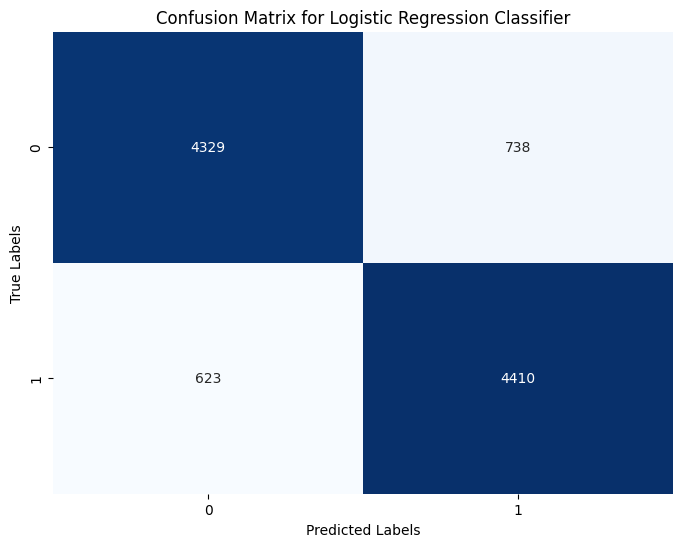

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_LR)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

**Decision Tree Classification**

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
DT = DecisionTreeClassifier()
#DT.fit(xv_train, y_train)
DT.fit(xv_train_np, y_train)

DecisionTreeClassifier()

In [32]:
#pred_dt = DT.predict(xv_test)
pred_dt = DT.predict(xv_test_np)

In [33]:
#DT.score(xv_test, y_test)
DT.score(xv_test_np, y_test)

0.746039603960396

In [34]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

          CG       0.74      0.76      0.75      5067
          OR       0.75      0.73      0.74      5033

    accuracy                           0.75     10100
   macro avg       0.75      0.75      0.75     10100
weighted avg       0.75      0.75      0.75     10100



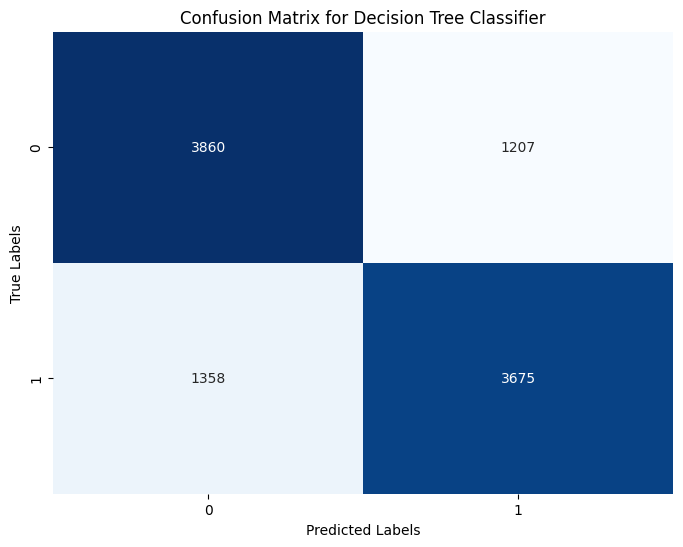

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_dt)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

**Random Forest Classifier**

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train_np, y_train)

RandomForestClassifier(random_state=0)

In [38]:
pred_rfc = RFC.predict(xv_test_np)

In [39]:
RFC.score(xv_test_np, y_test)

0.8435643564356435

In [41]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

          CG       0.81      0.90      0.85      5067
          OR       0.88      0.79      0.83      5033

    accuracy                           0.84     10100
   macro avg       0.85      0.84      0.84     10100
weighted avg       0.85      0.84      0.84     10100



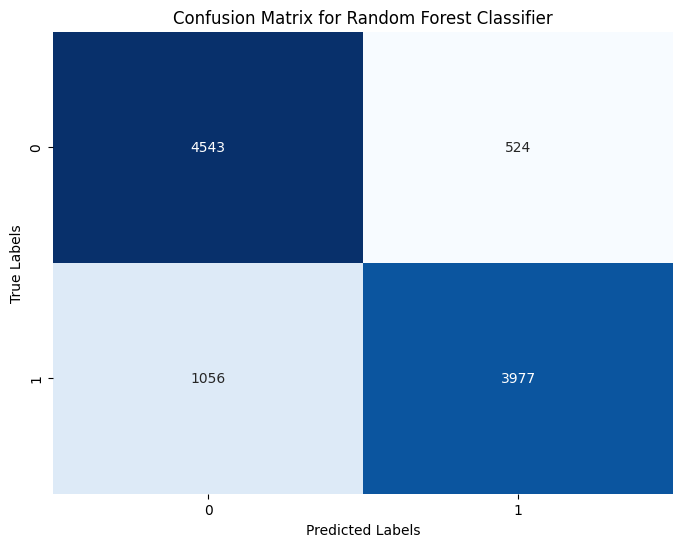

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_rfc)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

**Support Vector Machine Classifier**

In [43]:
from sklearn.svm import SVC

In [44]:
SVM = SVC(kernel='linear', random_state=0)
SVM.fit(xv_train_np, y_train)

SVC(kernel='linear', random_state=0)

In [45]:
pred_svm = SVM.predict(xv_test_np)

In [46]:
SVM.score(xv_test_np, y_test)

0.8714851485148515

In [47]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

          CG       0.87      0.87      0.87      5067
          OR       0.87      0.87      0.87      5033

    accuracy                           0.87     10100
   macro avg       0.87      0.87      0.87     10100
weighted avg       0.87      0.87      0.87     10100



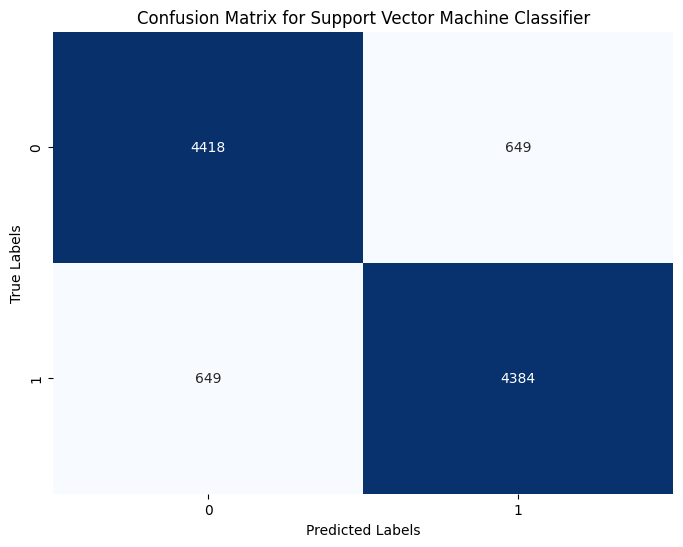

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_svm)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Support Vector Machine Classifier")
plt.show()

**K-Nearest Neighbors Classifier**

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(xv_train_np, y_train)

KNeighborsClassifier()

In [51]:
pred_knn = KNN.predict(xv_test_np)

In [52]:
KNN.score(xv_test_np, y_test)

0.5949504950495049

In [53]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

          CG       0.56      0.97      0.71      5067
          OR       0.87      0.22      0.35      5033

    accuracy                           0.59     10100
   macro avg       0.71      0.59      0.53     10100
weighted avg       0.71      0.59      0.53     10100



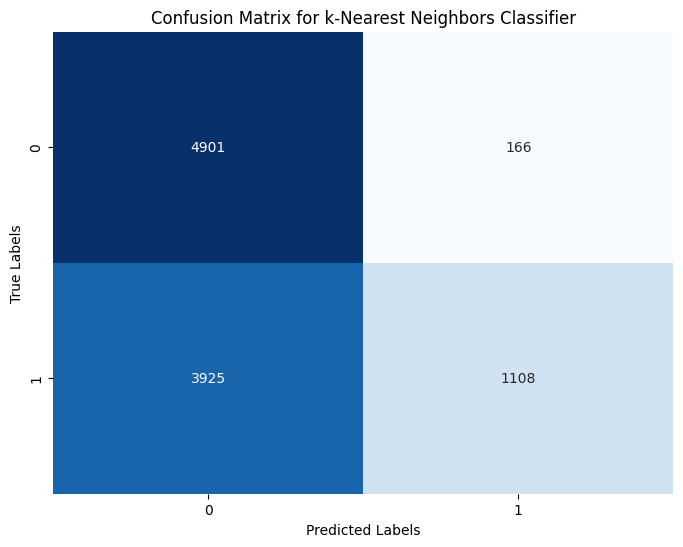

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_knn)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for k-Nearest Neighbors Classifier")
plt.show()

**Naive Bayes Classifier**

In [55]:
#from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [58]:
# NB = MultinomialNB()
# NB.fit(xv_train_np, y_train)
NB = GaussianNB()
NB.fit(xv_train_np.toarray(), y_train)

GaussianNB()

In [60]:
pred_nb = NB.predict(xv_test_np.toarray())

In [62]:
NB.score(xv_test_np.toarray(), y_test)

0.7111881188118812

In [63]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

          CG       0.66      0.87      0.75      5067
          OR       0.81      0.55      0.66      5033

    accuracy                           0.71     10100
   macro avg       0.73      0.71      0.70     10100
weighted avg       0.73      0.71      0.70     10100



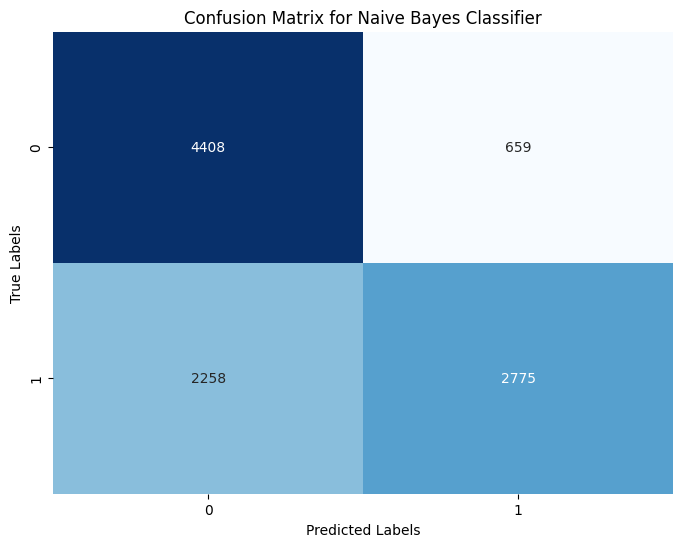

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_nb)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

In [73]:
def output_lable(n):
    if n == 'CG':
        return "Fake Review"
    elif n == 'OR':
        return "Not A Fake Review"

def manual_testing(review):
    testing_review = {"text":[review]}
    new_def_test = pd.DataFrame(testing_review)
    new_def_test["text"] = new_def_test["text"].apply(text_cleaning)
    new_x_test = new_def_test["text"]
    new_xv_test_array = vectorization.transform(new_x_test)

    new_xv_test_array_dense = new_xv_test_array.toarray()

    pred_LR = LR.predict(new_xv_test_array)
    pred_DT = DT.predict(new_xv_test_array)
    pred_RFC = RFC.predict(new_xv_test_array)
    pred_SVM = SVM.predict(new_xv_test_array)
    pred_KNN = KNN.predict(new_xv_test_array)
    pred_NB = NB.predict(new_xv_test_array_dense)
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {} \nSVM Prediction: {} \nKNN Prediction: {} \nNB Prediction: {} ".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_SVM[0]),
                                                                                                              output_lable(pred_KNN[0]),output_lable(pred_NB[0])))

In [81]:
review = input('Enter your review: ')
manual_testing(review)

Enter your review: this fan is really pretty


LR Prediction: Fake Review 
DT Prediction: Fake Review 
RFC Prediction: Fake Review 
SVM Prediction: Fake Review 
KNN Prediction: Fake Review 
NB Prediction: Fake Review 


In [80]:
review = input('Enter your review: ')
manual_testing(review)

Enter your review: Love it,a great upgrade from the original. I've had mine for a couple of years


LR Prediction: Fake Review 
DT Prediction: Fake Review 
RFC Prediction: Fake Review 
SVM Prediction: Fake Review 
KNN Prediction: Fake Review 
NB Prediction: Fake Review 


In [82]:
review = input('Enter your review: ')
manual_testing(review)

Enter your review: good one 


LR Prediction: Fake Review 
DT Prediction: Fake Review 
RFC Prediction: Fake Review 
SVM Prediction: Fake Review 
KNN Prediction: Fake Review 
NB Prediction: Fake Review 
